# Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights
**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


In [ ]:
# Import Libraries
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
# Importing csv file from Google Drive:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Extracted file ID from the link
file_id = "******************"  # Replace this with your actual file ID

# Specify the directory where the CSV file will be extracted
extracted_dir = "*********************"

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Download the ZIP file
!gdown --id $file_id -O "********************************"

# Unzip the file
with zipfile.ZipFile("***************************************", 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List files in the extracted directory (optional)
print("Files in the extracted directory:")
print(os.listdir(extracted_dir))

# Specify the name of the CSV file
csv_file_name = "amz_uk_price_prediction_dataset.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(os.path.join(extracted_dir, csv_file_name))

Mounted at /content/drive
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1dnWEDDXXIw8ELl0MeKYm7iTfZ2rM5elI
From (redirected): https://drive.google.com/uc?id=1dnWEDDXXIw8ELl0MeKYm7iTfZ2rM5elI&confirm=t&uuid=e20d3cfe-4407-4c5d-ab0c-3d39367e91f3
To: /content/extracted_data/amz_uk_price_prediction_dataset.csv.zip
100% 123M/123M [00:01<00:00, 62.5MB/s]
Files in the extracted directory:
['amz_uk_price_prediction_dataset.csv', 'amz_uk_price_prediction_dataset.csv.zip']


In [ ]:
df.shape

(2443651, 9)

In [ ]:
df.sample(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1699251,1913189,B0CCXQR8HV,Keratin Peptide Protein Patch，Natural Sizeup K...,0.0,0,5.55,False,0,Sports Supplements
887613,965436,B0CD9VDJ7K,Syrisora Touch High Jump Counter Toy Children ...,0.0,0,6.09,False,0,Sports & Outdoors
91402,99501,B0B27YYNGG,Silicone Protective Case Compatible with Wahoo...,0.0,0,8.99,False,0,Sports & Outdoors


# Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

## 1.1) Frequency Tables
* Generate a frequency table for the product category
* Which are the top 5 most listed product categories?

In [ ]:
# Create Frequency Table for [Product Category]:
product_category_freq_table = df['category'].value_counts()
product_category_freq_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [ ]:
# Get Top 5 most listed products:
top_5_products = product_category_freq_table.head(5)
top_5_products

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

## 1.2) Visualizations

* Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
* For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<ipython-input-7-c96d425f3c73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_freq_table, y=product_category_freq_table.values, palette='Set2')


<Axes: xlabel='count'>

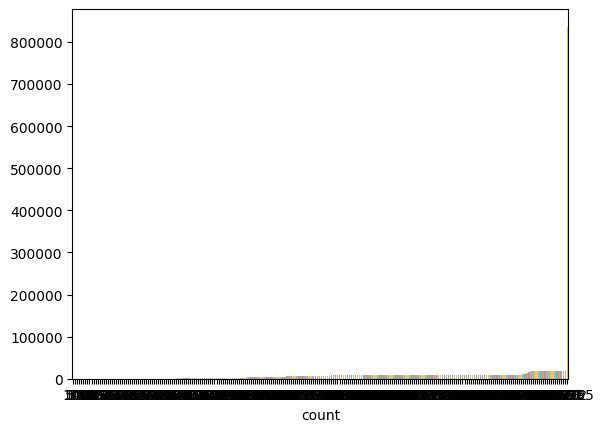

In [ ]:
# Barchart to display product category distribution:
sns.barplot(x=product_category_freq_table, y=product_category_freq_table.values, palette='Set2')
# Not good visually, so doing for a subset of porducts

In [ ]:
product_categories = top_5_products.index

<ipython-input-9-7c29983ccf13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_categories, y=top_5_products.values, palette='Set2')


<Axes: xlabel='category'>

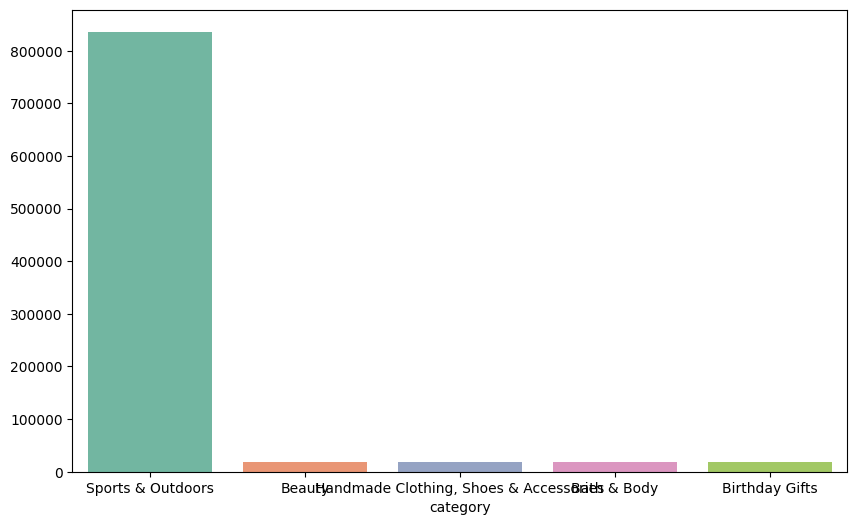

In [ ]:
# Barchart to display Top 5 product category distribution:
plt.figure(figsize=(10, 6))
sns.barplot(x=product_categories, y=top_5_products.values, palette='Set2')

([<matplotlib.patches.Wedge at 0x79421b28df90>,
 [Text(-0.28666771368868316, -1.0619894641325325, 'Sports & Outdoors'),
  Text(0.4891716928879617, 0.985246697470804, 'Beauty'),
  Text(0.35457891731888064, 1.0412846831644893, 'Handmade Clothing, Shoes & Accessories'),
  Text(0.21457431617737968, 1.0788687885174035, 'Bath & Body'),
  Text(0.0717914226731242, 1.0976547688734235, 'Birthday Gifts')],
 [Text(-0.1563642074665544, -0.5792669804359267, '91.61%'),
  Text(0.2668209233934336, 0.5374072895295293, '2.12%'),
  Text(0.19340668217393486, 0.5679734635442668, '2.11%'),
  Text(0.11704053609675254, 0.5884738846458565, '2.09%'),
  Text(0.0391589578217041, 0.5987207830218674, '2.08%')])

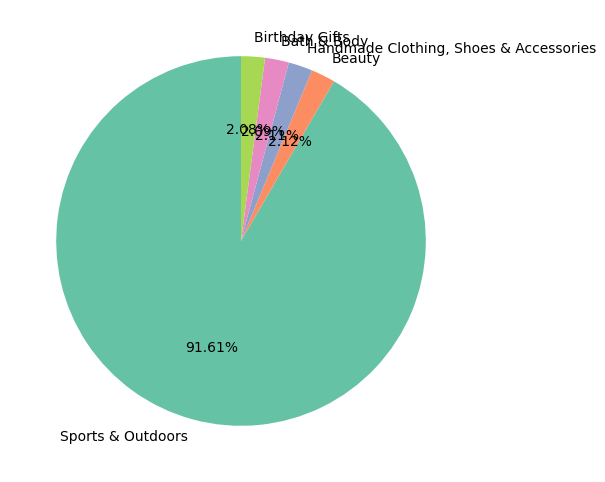

In [ ]:
# Pie chart with Top 5 Products
plt.figure(figsize=(6, 6))
plt.pie(top_5_products, labels=top_5_products.index, autopct='%1.2f%%', startangle=90, colors=sns.color_palette('Set2'))

###  Conclusions Part 1:

In this case (Amazon UK products) using charts is most effective when focusing on a subset of few categories, like the top 5 products. The pie chart clearly shows that 'Sports & Outdoors' is the dominant product category.

# Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

## 2.1) Measures of Centrality

* Calculate the mean, median, and mode for the price of products.
* What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [ ]:
# Get price mean:
price_mean = df['price'].mean().round(2)
price_mean

89.24

In [ ]:
# Get price median:
df['price'].median().round(2)

19.09

In [ ]:
# Get price mode:
price_mode = df['price'].mode()
price_mode

0    9.99
Name: price, dtype: float64

In [ ]:
# Difference mean(average price) versus price mode:
diff_price = price_mean - price_mode
diff_price

0    79.25
Name: price, dtype: float64

**Conclusion 2.1**: The average price and the most common price are very different, almost 89% apart. This means most prices are lower than the average, but a few higher prices are pulling the average up.

## 2.2) Measures of Dispersion

* Determine the variance, standard deviation, range, and interquartile range for product 'price'.
* How varied are the product prices? Are there any indicators of a significant spread in prices?

In [ ]:
# Do 'describe' to see percentiles
describe_data = df['price'].describe().round(2)
describe_data

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [ ]:
# Price 'std dev'
std_dev = describe_data['std']
std_dev

345.61

## 2.3) Visualizations

* Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.

* Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [ ]:
# Create Price Freq Table:
price_freq_table = df['price'].value_counts().sort_index(ascending=False)
price_freq_table

price
100000.00      1
77752.00       1
24674.59       1
23482.73       1
22933.42       1
            ... 
0.04          13
0.03           2
0.02           7
0.01         694
0.00          20
Name: count, Length: 82916, dtype: int64

In [ ]:
# Find Top 20 prices range (form high to low)
price_top_20 = price_freq_table.head(20)
price_top_20

price
100000.00    1
77752.00     1
24674.59     1
23482.73     1
22933.42     1
21999.00     2
21464.82     3
20489.75     1
20216.00     1
20015.45     1
19999.00     4
19990.00     1
19290.93     1
19211.51     1
18244.80     1
18169.83     1
18144.00     1
17837.54     1
17611.51     1
17139.30     1
Name: count, dtype: int64

<Axes: ylabel='price'>

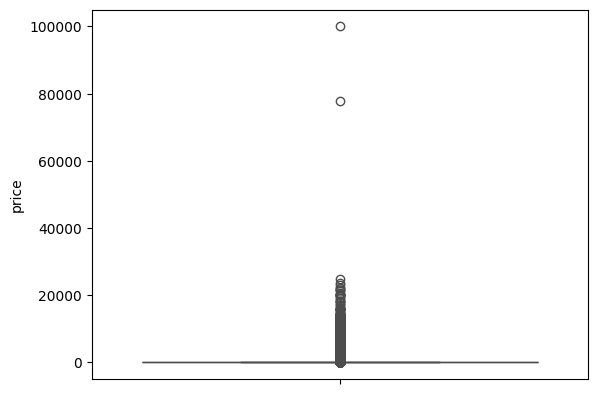

In [ ]:
# Boxplot with prices to see distribution:
sns.boxplot(data=df['price'], color='orange')

<ipython-input-20-b0fa7bf4e0b7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], kde=True, hist=True, color='orange')


<Axes: xlabel='price', ylabel='Density'>

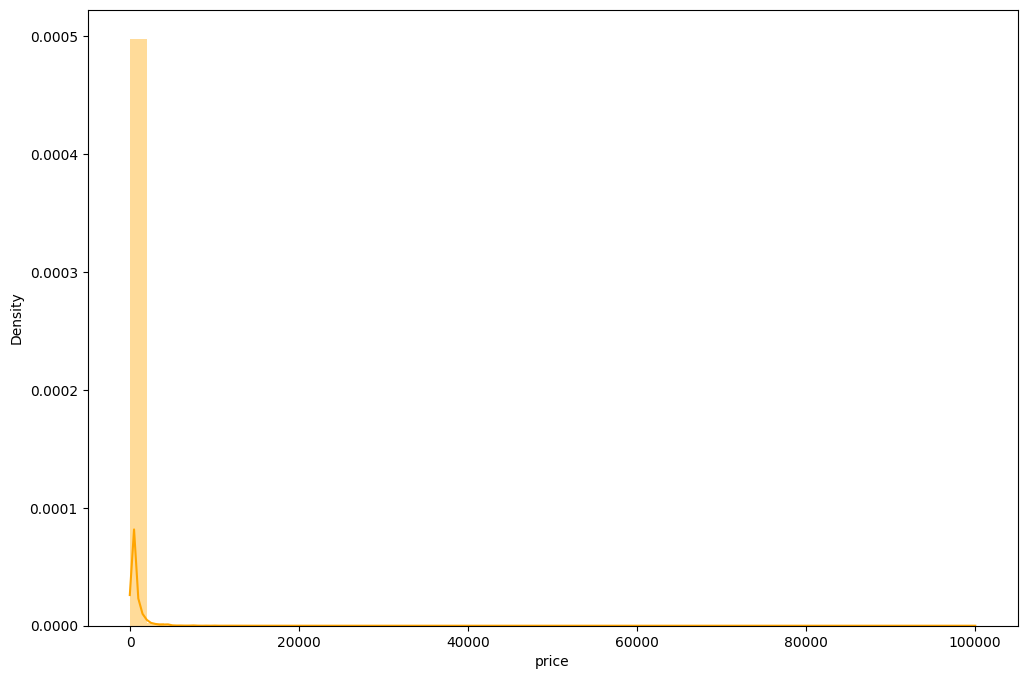

In [ ]:
# Distribution plot has better visualization:
plt.figure(figsize=(12, 8))
sns.distplot(df['price'], kde=True, hist=True, color='orange')

### Conclusion Part 2:

There is a lot of outliers (single product units) with very high prices (over 20k price until 100k). Last chart provides a better image of price distribution.

# Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

## 3.1) Measures of Centrality:

* Calculate the mean, median, and mode for the rating of products.
* How do customers generally rate products? Is there a common trend?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [ ]:
df.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [ ]:
df['stars'].isnull().sum()

0

In [ ]:
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [ ]:
# stars mean
df['stars'].mean().round(2)

2.15

In [ ]:
# stars median
df['stars'].median().round(2)

0.0

In [ ]:
# stars Mode
df['stars'].mode()

0    0.0
Name: stars, dtype: float64

<Axes: xlabel='stars'>

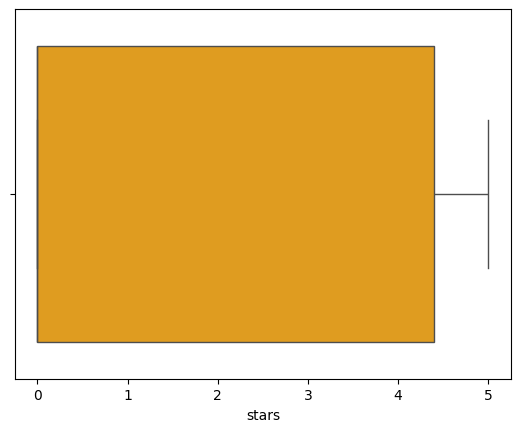

In [ ]:
# Trying box plot for 'stars'
sns.boxplot(x='stars', data=df, color='orange')

## 3.2) Measures of Dispersion

* Determine the variance, standard deviation, and interquartile range for product rating.
* Are the ratings consistent, or is there a wide variation in customer feedback?

In [ ]:
# Variance product ratings ('stars'):
variance_rating = df['stars'].var().round(2)
variance_rating

4.82

In [ ]:
# Standard deviation product ratings:
std_rating = df['stars'].std().round(2)
std_rating

2.19

In [ ]:
# Interquartile Range (=Third quartil - First quartil):
q1_rating = df['stars'].quantile(0.25)
q3_rating = df['stars'].quantile(0.75)

int_qtl_rating = q3_rating - q1_rating
int_qtl_rating

4.4

### Conclusions 3.2

* **Variance** (4.82): Quite high variance from the mean (2.15), so diverse opinions among customers in terms of product ratings (stars).
* **Standard Deviation** (2.19): Similar to variance it shows significant spread in customer ratings (stars).
* **Interquartile Range** (4.4): The middle 50% of ratings have a spread of 4.4, indicating moderate variability in customer rating (stars) within this range.


## 3.3) Shape of the Distribution

* Calculate the skewness and kurtosis for the rating column.
* Are the ratings normally distributed, or do they lean towards higher or lower values?


In [ ]:
# Skewness of product rating (stars)
skew_rating = df.stars.skew().round(2)
skew_rating

0.08

In [ ]:
# Kurtosis of product rating (stars)
kurt_rating = df.stars.kurtosis().round(2)
kurt_rating

-1.93

### Conclusions 3.3
* **Skewness** (0.08): Is close to 0, menaing almost symetric distribution and positive so skewness slightly to the right.
* **Kurtosis** (-1.93): With a kurtosis of -1.93, the distribution is 'platykurtic', meaning that it has thinner tails and a flatter peak than a normal distribution.

## 3.4) Visualizations

* Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

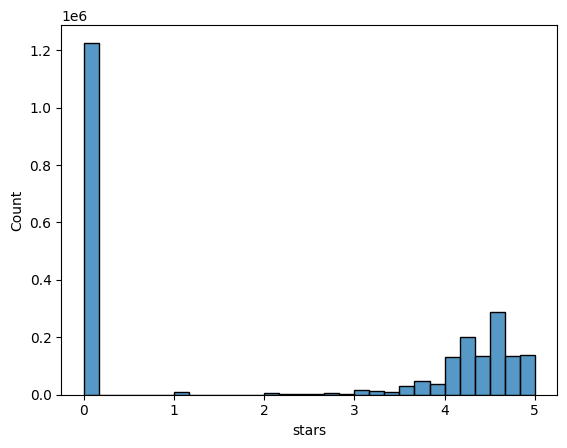

In [ ]:
# Trying 'histplot' to visualize data:
histplot_ratings = sns.histplot(df['stars'], bins=30)
histplot_ratings

### Conclusions 3.4

* The Histrogram is very helpful to see the rating distribiution
* Most of the people rate with 0 (which i undrestand a sno rating) or if not between 4-5 if rated.